In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import gzip
import xmltodict
from xmltodict import parse
from urllib.request import urlopen

from zipfile import ZipFile
from io import BytesIO
from pathlib import Path
import pandas as pd
import geopandas as gpd
import shapely
import plotly
import plotly.express as px

In [49]:
ibb = pd.read_excel("https://data.ibb.gov.tr/dataset/d3df8db4-1ac6-4bfe-8896-7ec1159caa2b/resource/7aec630d-2757-4da0-97f1-71b140abd818/download/2021-yl-ya-grubuna-gore-rayl-sistemler-istasyon-bazl-yolcu-ve-yolculuk-saylar.xlsx")

In [46]:
ibb['latitude'] = pd.to_numeric(ibb['latitude'], errors='coerce')
ibb['longitude'] = pd.to_numeric(ibb['longitude'], errors='coerce')
ibb

,passage_cnt,passanger_cnt,transaction_year,transaction_month,line,station_name,station_number,town,latitude,longitude,Age-Group
0,7.424,4.227,2.021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,4.103406e+14,2.899203e+14,20-30
1,18.374,9.479,2.021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,4.103406e+14,2.899203e+14,30-60
2,3.190,1.430,2.021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,4.103406e+14,2.899203e+14,60+
3,949.000,469.000,2.021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,4.103406e+14,2.899203e+14,<20
4,8.673,4.222,2.021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,4.103406e+14,2.899203e+14,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
17077,9.295,8.209,2.021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,4.105333e+14,2.893356e+14,20-30
17078,10.554,9.361,2.021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,4.105333e+14,2.893356e+14,30-60
17079,1.552,1.235,2.021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,4.105333e+14,2.893356e+14,60+
17080,3.319,2.632,2.021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,4.105333e+14,2.893356e+14,<20


In [47]:
ibb['latitude'] = ibb['latitude'].div(10000000000000)
ibb['longitude'] = ibb['longitude'].div(10000000000000)
ibb

,passage_cnt,passanger_cnt,transaction_year,transaction_month,line,station_name,station_number,town,latitude,longitude,Age-Group
0,7.424,4.227,2.021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,41.034056,28.992028,20-30
1,18.374,9.479,2.021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,41.034056,28.992028,30-60
2,3.190,1.430,2.021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,41.034056,28.992028,60+
3,949.000,469.000,2.021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,41.034056,28.992028,<20
4,8.673,4.222,2.021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,41.034056,28.992028,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
17077,9.295,8.209,2.021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,41.053333,28.933556,20-30
17078,10.554,9.361,2.021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,41.053333,28.933556,30-60
17079,1.552,1.235,2.021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,41.053333,28.933556,60+
17080,3.319,2.632,2.021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,41.053333,28.933556,<20


In [8]:
ibb.columns

Index(['passage_cnt', 'passanger_cnt', 'transaction_year', 'transaction_month',
       'line', 'station_name', 'station_number', 'town', 'latitude',
       'longitude', 'Age-Group'],
      dtype='object')

We can see the number of passengers, the number of trips, the lines of the railway, the name of the station, the time, the district, age groups of passangers , latitude and longitude with this dataset. It can be excessed how 5 types of age groups use each railway station in 2021.

In [9]:
data = ibb.groupby('station_name').sum()
data

,passage_cnt,passanger_cnt,transaction_year,transaction_month,latitude,longitude
station_name,,,,,,
4 Levent 2 Güney,2611.597,978.156,127.323,399,2588.400500,1827.432250
4 Levent Kuzey,3456.341,1253.533,121.260,390,2465.143333,1740.411667
AKSARAY,5207.676,2445.726,125.302,396,2542.733667,1794.769111
AKSARAY 1,1851.161,805.858,121.260,390,2460.710000,1736.873333
ALTINŞEHİR,1505.429,2832.002,121.260,390,2461.001667,1748.406667
...,...,...,...,...,...,...
Şehitlik,3724.291,1409.887,121.260,390,2462.056667,1735.700000
Şişhane Güney,2515.602,1005.997,121.260,390,2461.723333,1738.493333
Şişhane Kuzey,2474.402,1383.547,121.260,390,2461.723333,1738.493333


In [27]:
data_2 = ibb.groupby(['Age-Group','station_name']).sum()
data_2

passage_cnt  passanger_cnt  transaction_year  \
Age-Group station_name                                                     
20-30     4 Levent 2 Güney      923.222        350.524            26.273   
          4 Levent Kuzey       1079.687        394.998            24.252   
          AKSARAY              1427.715        723.686            26.273   
          AKSARAY 1             550.282        257.653            24.252   
          ALTINŞEHİR            434.040        137.948            24.252   
...                                 ...            ...               ...   
Unknown   Şehitlik              397.737        140.686            24.252   
          Şişhane Güney         288.084        126.111            24.252   
          Şişhane Kuzey         312.492        185.409            24.252   
          Şişli 2 Kuzey        1025.499        406.313            26.273   
          Şişli Güney           559.931        302.142            24.252   

                            transaction_month    latitude   longitude  
Age-Group station_name                                                 
20-30     4 Levent 2 Güney                 81  534.114389  377.089194  
          4 Levent Kuzey                   78  493.028667  348.082333  
          AKSARAY                          81  533.153833  376.322556  
          AKSARAY 1                        78  492.142000  347.374667  
          ALTINŞEHİR                       78  492.200333  349.681333  
...                                       ...         ...         ...  
Unknown   Şehitlik                         78  492.411333  347.140000  
          Şişhane Güney                    78  492.344667  347.698667  
          Şişhane Kuzey                    78  492.344667  347.698667  
          Şişli 2 Kuzey                    82  533.830556  376.897806  
          Şişli Güney                      78  492.766667  347.905667  

[1388 rows x 6 columns]

In [28]:
data_3 = ibb.groupby(['Age-Group']).sum()
data_3

,passage_cnt,passanger_cnt,transaction_year,transaction_month,latitude,longitude
Age-Group,,,,,,
20-30,208276.791,125952.211,6919.904,22180,104889.333255,72248.049569
30-60,274339.011,128156.894,6925.967,22168,104930.442782,72306.084264
60+,228211.367,510778.628,6869.379,22038,104109.284588,71699.073514
<20,176080.183,331303.876,6879.484,22083,104314.538810,71814.426458
Unknown,104299.328,205133.463,6927.988,22205,105094.858977,72394.224958


Text(0, 0.5, 'Latitude')

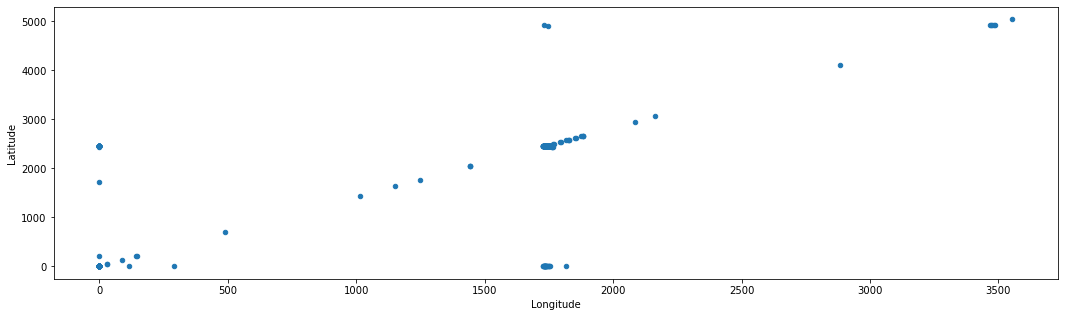

In [31]:
data.plot(x="longitude", y="latitude", kind="scatter", colormap="YlOrRd", figsize = (18,5))

plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [16]:
st = np.unique(ibb['station_name'])
st

array(['4 Levent 2 Güney', '4 Levent Kuzey', 'AKSARAY', 'AKSARAY 1',
       'ALTINŞEHİR', 'ALİBEYKÖY BATI', 'ALİBEYKÖY DOĞU', 'ATAKOY',
       'Acıbadem (Batı)', 'Acıbadem (Doğu)', 'Aksaray', 'Akıncılar',
       'Akşemsettin', 'Ali Fuat Başgil', 'Alibeyköy', 'Alibeyköy Metro',
       'Altunizade 1', 'Altunizade 2', 'Ataköy', 'Atalar',
       'Atatürk Oto Sanayi Güney', 'Atatürk Oto Sanayi Kuzey',
       'Atatürk Öğrenci Yurdu', 'Aydıntepe', 'Ayrılıkçeşme',
       'Ayrılıkçeşmesi', 'Ayvansaray', 'BAGCILAR MEYDAN', 'BAHCELIEVLER',
       'BAKIRKOY', 'BAYRAMPASA', 'Bahçelievler', 'Bakırköy-1',
       'Bakırköy-2', 'Balat', 'Bağcılar', 'Bağlarbaşı', 'Başak',
       'Başak Konutları', 'Baştabya', 'Bereç', 'Beyazıt', 'Beyoğlu',
       'Bostancı', 'Bostancı (Batı)', 'Bostancı (Doğu)', 'Bostancı-1',
       'Bostancı-2', 'Boğaziçi', 'Bulgurlu', 'Cami', 'Cebeci',
       'Cep Otogar', 'Cevizli-1', 'Cevizli-2', 'Cibali', 'Cumhuriyet',
       'DAVUTPASA', 'DUDULLU', 'Darüşşafaka', 'Darüşşafaka Güne